# Vanishing Gradients Demonstration

This notebook demonstrates how gradients can vanish in a deep neural network. We use a simple feedforward network built with PyTorch to illustrate how gradients can vanish exponentially across layers during backpropagation.

**Key points:**
- A deep network with many layers is used.
- Tanh activation is applied.
- Gradient norms are computed and visualized.


In [1]:
# Import required libraries
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [3]:
#  Generate simple dataset
# Let's use a basic regression dataset: y = x^2

torch.manual_seed(42) # Taking the seed for reproducibility of our results

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1).to(device)  # shape: [100, 1]
y = x ** 2 + 0.1 * torch.randn(x.size()).to(device)

In [4]:
# Define a deep neural network prone to vanishing gradients
class DeepNetwork(nn.Module):
    def __init__(self):
        super(DeepNetwork, self).__init__()
        self.hidden_layers = nn.Sequential(
            nn.Linear(1, 32),
            nn.Tanh(),  # Tanh activation is more prone to vanishing gradients
            nn.Linear(32, 32),
            nn.Tanh(),
            nn.Linear(32, 32),
            nn.Tanh(),
            nn.Linear(32, 32),
            nn.Tanh(),
            nn.Linear(32, 32),
            nn.Tanh(),
            nn.Linear(32, 32),
            nn.Tanh()
        )
        self.output_layer = nn.Linear(32, 1)

    def forward(self, x):
        x = self.hidden_layers(x)
        out = self.output_layer(x)
        return out

In [5]:
model = DeepNetwork().to(device)

# Define Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [6]:
# Train the network and track gradients
num_epochs = 200
losses = []
gradient_norms = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(x)
    loss = criterion(outputs, y)
    loss.backward()

    # Track gradient norm of the first layer weights
    grad_norm = model.hidden_layers[0].weight.grad.norm().item()
    gradient_norms.append(grad_norm)

    optimizer.step()
    losses.append(loss.item())

    if epoch % 20 == 0:
        print(f"Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}, Grad Norm (1st layer): {grad_norm:.6f}")

Epoch [0/200], Loss: 0.3878, Grad Norm (1st layer): 0.005643
Epoch [20/200], Loss: 0.1466, Grad Norm (1st layer): 0.003626
Epoch [40/200], Loss: 0.1095, Grad Norm (1st layer): 0.002834
Epoch [60/200], Loss: 0.1045, Grad Norm (1st layer): 0.002495
Epoch [80/200], Loss: 0.1038, Grad Norm (1st layer): 0.002352
Epoch [100/200], Loss: 0.1036, Grad Norm (1st layer): 0.002284
Epoch [120/200], Loss: 0.1035, Grad Norm (1st layer): 0.002243
Epoch [140/200], Loss: 0.1034, Grad Norm (1st layer): 0.002214
Epoch [160/200], Loss: 0.1033, Grad Norm (1st layer): 0.002191
Epoch [180/200], Loss: 0.1032, Grad Norm (1st layer): 0.002171


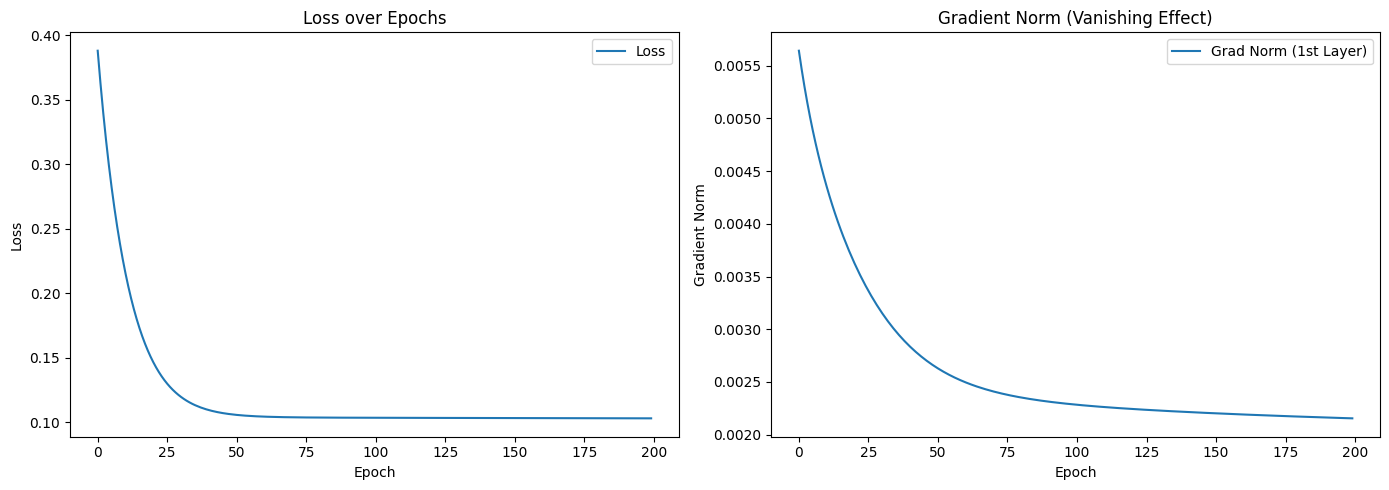

In [7]:
# Plot Loss and Gradient Norm
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(losses, label="Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(gradient_norms, label="Grad Norm (1st Layer)")
plt.title("Gradient Norm (Vanishing Effect)")
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.legend()

plt.tight_layout()
plt.show()